austen-sense.txt 문서를 사용하여 다음 지시사항을 수행하라.
1.토큰생성 : 정규표현식으로 단어 토큰을 생성한다.
2.형태소 분석을 하여 명사만 추출한다
3.추출된 명사리스트를 사용하여 출현빈도 구하라.
4.명사출현빈도를 사용하여 wordcloud를 작성하라.
 -워드클라우드 모양은 임의의 이미지를 사용하여 지정한다.

In [2]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
sense_raw = nltk.corpus.gutenberg.raw("austen-sense.txt")
print(sense_raw[:1302])

[Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settled in Sussex.
Their estate was large, and their residence was at Norland Park,
in the centre of their property, where, for many generations,
they had lived in so respectable a manner as to engage
the general good opinion of their surrounding acquaintance.
The late owner of this estate was a single man, who lived
to a very advanced age, and who for many years of his life,
had a constant companion and housekeeper in his sister.
But her death, which happened ten years before his own,
produced a great alteration in his home; for to supply
her loss, he invited and received into his house the family
of his nephew Mr. Henry Dashwood, the legal inheritor
of the Norland estate, and the person to whom he intended
to bequeath it.  In the society of his nephew and niece,
and their children, the old Gentleman's days were
comfortably spent.  His attachment to them all increased.
The constant attention 

In [4]:
#정규표현식 토큰생성
from nltk.tokenize import RegexpTokenizer
retToken=RegexpTokenizer("[\w]+")
# \w -> 문자만 분리
retToken.tokenize(sense_raw)
# 공백제거 

['Sense',
 'and',
 'Sensibility',
 'by',
 'Jane',
 'Austen',
 '1811',
 'CHAPTER',
 '1',
 'The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 'Their',
 'estate',
 'was',
 'large',
 'and',
 'their',
 'residence',
 'was',
 'at',
 'Norland',
 'Park',
 'in',
 'the',
 'centre',
 'of',
 'their',
 'property',
 'where',
 'for',
 'many',
 'generations',
 'they',
 'had',
 'lived',
 'in',
 'so',
 'respectable',
 'a',
 'manner',
 'as',
 'to',
 'engage',
 'the',
 'general',
 'good',
 'opinion',
 'of',
 'their',
 'surrounding',
 'acquaintance',
 'The',
 'late',
 'owner',
 'of',
 'this',
 'estate',
 'was',
 'a',
 'single',
 'man',
 'who',
 'lived',
 'to',
 'a',
 'very',
 'advanced',
 'age',
 'and',
 'who',
 'for',
 'many',
 'years',
 'of',
 'his',
 'life',
 'had',
 'a',
 'constant',
 'companion',
 'and',
 'housekeeper',
 'in',
 'his',
 'sister',
 'But',
 'her',
 'death',
 'which',
 'happened',
 'ten',
 'years',
 'before',
 'his',
 'own',
 'produced',
 'a',
 '

In [5]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\it\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
#  명사만 추출하기전에 전체 구분하기
from nltk.tag import pos_tag
tagged_list=pos_tag(retToken.tokenize(sense_raw))
tagged_list

[('Sense', 'NN'),
 ('and', 'CC'),
 ('Sensibility', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1811', 'CD'),
 ('CHAPTER', 'NNP'),
 ('1', 'CD'),
 ('The', 'DT'),
 ('family', 'NN'),
 ('of', 'IN'),
 ('Dashwood', 'NNP'),
 ('had', 'VBD'),
 ('long', 'RB'),
 ('been', 'VBN'),
 ('settled', 'VBN'),
 ('in', 'IN'),
 ('Sussex', 'NNP'),
 ('Their', 'NNP'),
 ('estate', 'NN'),
 ('was', 'VBD'),
 ('large', 'JJ'),
 ('and', 'CC'),
 ('their', 'PRP$'),
 ('residence', 'NN'),
 ('was', 'VBD'),
 ('at', 'IN'),
 ('Norland', 'NNP'),
 ('Park', 'NNP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('centre', 'NN'),
 ('of', 'IN'),
 ('their', 'PRP$'),
 ('property', 'NN'),
 ('where', 'WRB'),
 ('for', 'IN'),
 ('many', 'JJ'),
 ('generations', 'NNS'),
 ('they', 'PRP'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('in', 'IN'),
 ('so', 'RB'),
 ('respectable', 'JJ'),
 ('a', 'DT'),
 ('manner', 'NN'),
 ('as', 'IN'),
 ('to', 'TO'),
 ('engage', 'VB'),
 ('the', 'DT'),
 ('general', 'JJ'),
 ('good', 'JJ'),
 ('opinion', 'NN'),
 ('of', 

In [7]:
# 명사만 추출하기
noun_list=[t[0] for t in tagged_list if t[1]=='NN']
noun_list

['Sense',
 'family',
 'estate',
 'residence',
 'centre',
 'property',
 'manner',
 'opinion',
 'surrounding',
 'owner',
 'estate',
 'man',
 'age',
 'life',
 'companion',
 'housekeeper',
 'sister',
 'death',
 'alteration',
 'home',
 'loss',
 'house',
 'family',
 'inheritor',
 'estate',
 'person',
 'society',
 'nephew',
 'niece',
 's',
 'attachment',
 'attention',
 'interest',
 'goodness',
 'heart',
 'degree',
 'comfort',
 'age',
 'cheerfulness',
 'relish',
 'existence',
 'marriage',
 'son',
 'lady',
 'son',
 'man',
 'fortune',
 'mother',
 'half',
 'coming',
 'age',
 'marriage',
 'likewise',
 'wealth',
 'succession',
 'estate',
 'father',
 's',
 'property',
 'mother',
 'nothing',
 'father',
 'disposal',
 'moiety',
 'wife',
 's',
 'fortune',
 'child',
 'life',
 'interest',
 'gentleman',
 'disappointment',
 'pleasure',
 'estate',
 'nephew',
 'value',
 'sake',
 'wife',
 'son',
 'son',
 'son',
 'son',
 'child',
 'way',
 'power',
 'provision',
 'charge',
 'estate',
 'sale',
 'whole',
 'benefit

In [8]:
# text 클래스에 저장, 빈도구하기
from nltk import Text
text=Text(retToken.tokenize(sense_raw))
print(text)

<Text: Sense and Sensibility by Jane Austen 1811 CHAPTER...>


In [9]:
from nltk import FreqDist
stopword=['Mr.','Mrs.','Miss','Mr','Mrs','Dear','A','No','Ah','Oh']
# 감탄사들도 서치에 걸려서(대문자) 제외
sense_raw_token=pos_tag(retToken.tokenize(sense_raw))
# 나누어진 토큰들에 태그, 형태소가 고유명사이고, 고유명사들 중에서 이런 글자가 아닌것을 뽑을것
name_list=[t[0] for t in sense_raw_token if t[1]=='NNP' and t[0] not in stopword] 
name_list 

['Sensibility',
 'Jane',
 'Austen',
 'CHAPTER',
 'Dashwood',
 'Sussex',
 'Their',
 'Norland',
 'Park',
 'Henry',
 'Dashwood',
 'Norland',
 'Gentleman',
 'Henry',
 'Dashwood',
 'Henry',
 'Dashwood',
 'Norland',
 'Their',
 'Dashwood',
 'Norland',
 'Dashwood',
 'Dashwood',
 'John',
 'Dashwood',
 'John',
 'Dashwood',
 'John',
 'Dashwood',
 'Yes',
 'Three',
 'John',
 'Dashwood',
 'Dashwood',
 'HER',
 'John',
 'Dashwood',
 'So',
 'Dashwood',
 'Elinor',
 'Dashwood',
 'Marianne',
 'Elinor',
 'Elinor',
 'Dashwood',
 'Elinor',
 'Margaret',
 'Marianne',
 'CHAPTER',
 'John',
 'Dashwood',
 'Norland',
 'Norland',
 'Dashwood',
 'John',
 'Dashwood',
 'How',
 'Harry',
 'Fanny',
 'Something',
 'Norland',
 'Well',
 'LET',
 'Consider',
 'Harry',
 'REALLY',
 'THEY',
 'Dashwood',
 'Fifteen',
 'Fanny',
 'Twice',
 'Her',
 'Dashwood',
 'NOT',
 'Undoubtedly',
 'Dashwood',
 'Altogether',
 'Their',
 'YOU',
 'Dashwood',
 'My',
 'John',
 'Dashwood',
 'Norland',
 'Stanhill',
 'Yes',
 'THEY',
 'THEM',
 'Dashwood',
 '

In [10]:
# 가장 높은 빈도수의 상위 10개
fd_name.most_common(10)

NameError: name 'fd_name' is not defined

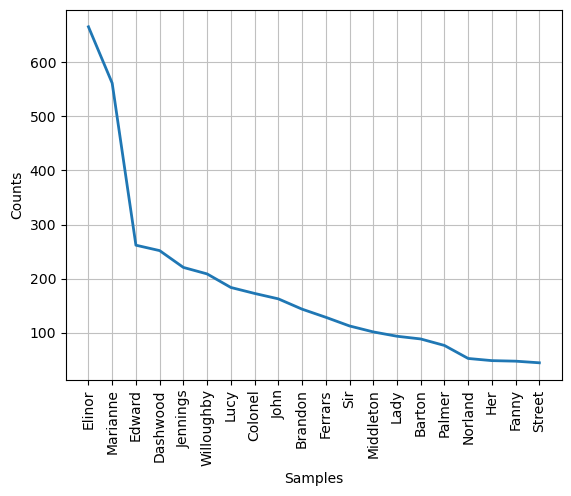

In [ ]:
# fd_name 그래프
fd_name.plot(20)
plt.show()

In [ ]:
from wordcloud import WordCloud
from PIL import Image
# 이미지 객체사용
import numpy as np
import matplotlib.pyplot as plt

im=Image.open('c:\img.png')
mask_arr=np.array(im)
mask_arr

wc=WordCloud(width=1000, height=800, background_color='black',
             mask=mask_arr,random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis("off")
plt.show()

NameError: name 'fd_name' is not defined